**Question 1**
To begin let's look at a simple model of an arbitray layer of the neural network. 
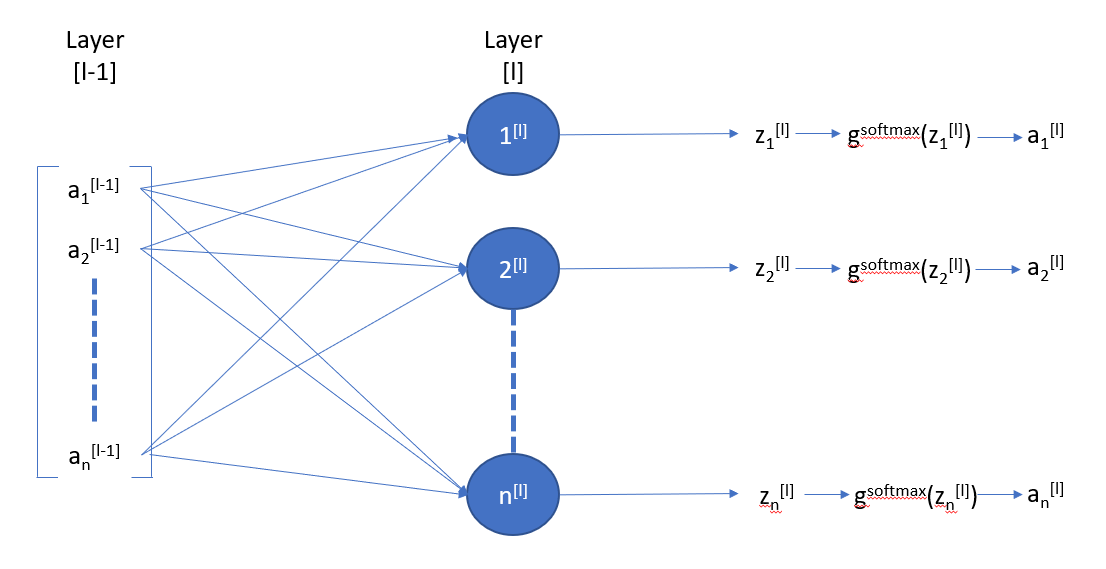

The softmax function is a probablistic vector function of the form:

$g^{softmax}(z_i^l) = \frac{e^{z_i^l}}{\sum_{j=1}^{K}e^{z_j^l}} = a_i^l$ where $l$ corresponds to the network layer and $i$ to the particular output of the $i^{th}$ neuron. 

On the forward pass we know that $z^l = w^l*a^{l-1}+b^l$ where $a^{l-1}$ is the activation of previous layer. From here, the loss for a single instance can be defined by 

$L = {\sum_{k=1}^{n}y_k * ln(a_k^l)}$

However, the loss is essentially a function of $w$ and $b$ since $a^l_k$ is the output of $g(z^l_k)$ for a particular z. Therefore the gradient for each parameter can be written as the following. 

$\frac{\partial{L}}{\partial{w}} = \frac{\partial{L}}{\partial{z}} * \frac{\partial{z}}{\partial{w}}  $

$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{z}} * \frac{\partial{z}}{\partial{b}}  $

Of these derivatvies, $\frac{\partial{z}}{\partial{w}}$ is trivial since it amounts to $a_i^{l-1}$. $\frac{\partial{L}}{\partial{z}}$ is trickier and requires a deeper explanation. 

Since $g$ is a vector function, taking it's derivative is the equivalent to the Jacobian matrix, the matrix of all first-order partial derivatives. This is because the mapping it performs is not $\mathbb{R}^n \rightarrow \mathbb{R}$ like in a gradient, but rather $\mathbb{R}^n \rightarrow \mathbb{R}^n$. The output of $g$ is an $n\times1$ vector since it takes $z$ as an input which is also $n\times1$. The following matrix is an example of the Jacobian of $g$

\begin{align}
    z &= \begin{bmatrix}
           z^l_{1} \\
           z^l_{2} \\
           \vdots \\
           z^l_{n}
         \end{bmatrix}
         \rightarrow 
    g = \begin{bmatrix}
           g_1 \\
           g_2 \\
           \vdots \\
           g_n
         \end{bmatrix}
         where \space g_i = g(z^l_{i})
  \end{align}


\begin{bmatrix}
    \frac{\partial{g_1}}{\partial{z_1}}       & \frac{\partial{g_1}}{\partial{z_2}}  & \dots & \frac{\partial{g_1}}{\partial{z_n}}\\
   \frac{\partial{g_2}}{\partial{z_1}}        & \frac{\partial{g_2}}{\partial{z_2}}  & \dots & \frac{\partial{g_2}}{\partial{z_n}}  \\
    \ldots \\
    \frac{\partial{g_n}}{\partial{z_1}}        & \frac{\partial{g_n}}{\partial{z_2}}   & \dots & \frac{\partial{g_n}}{\partial{z_n}} 
\end{bmatrix}

For an arbitrary partial derivative at $i,j$ the equation looks like the following.

 $\frac{\partial{g_i}}{\partial{z^l_j}} = \frac{\partial{\frac{e^{z_i^l}}{\sum_{k=1}^{K}e^{z_k^l}}}}{\partial{z^l_j}} $ 

Starting with the bottom derivative using quotient rule where $f = e^{z_i^l}$  and $h = \sum_{k=1}^{K}e^{z_k^l}$. The derivative of $h$ w.r.t to $z_j$ will always be $e^{z^l_j}$ since the derivative can go into the sum and $\frac{\partial{}}{\partial{z_j}}e^{z_k^l} = 0$ if $i\neq j$.
 
The derivative of $f$ w.r.t $z^l_j$ is $f' = e^{z^l_j}$ only if $i = j$. Otherwise $f' = 0$. 

After putting the above together into the quotient rule formula we get

Quotient Rule $ = \frac{f'h-fh'}{h^2}$

IF $i = j$

$ =\frac{e^{z^l_i}\sum_{k=1}^{K}e^{z_k^l}-e^{z^l_j}e^{z^l_i}}{(\sum_{k=1}^{K}e^{z_k^l})^2}$

After rearranging

$=\frac{e^{z^l_i}}{\sum_{k=1}^{K}e^{z_k^l}}*\frac{\sum_{k=1}^{K}e^{z_k^l}-e^{z_j^l}}{\sum_{k=1}^{K}e^{z_k^l}}$

$=g^{softmax}(z_i^l)(1-g^{softmax}(z_i^l))$

OR IF $i \neq j$

$=\frac{0-e^{z^l_j}e^{z^l_i}}{(\sum_{k=1}^{K}e^{z_k^l})^2}$

$=-g^{softmax}(z_i^l)g^{softmax}(z_j^l)$

Now that derivative of the sfotmax function has been establishes. The derivative with respect to teh weights is trivial. 

$\frac{\partial{L}}{\partial{w}} = \frac{\partial{L}}{\partial{z}} * \frac{\partial{z}}{\partial{w}}$

if $i = j$

$=g^{softmax}(z_i^l)(1-g^{softmax}(z_i^l)) * \boldsymbol{a^{[l-1]}}$ where $\boldsymbol{a^{[l-1]}}$ is the output vector of the previous layer. 

and if $i \neq j$

$=-g^{softmax}(z_i^l)g^{softmax}(z_j^l)*\boldsymbol{a^{[l-1]}}$

Similarily for $b$, 

$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{z}} * \frac{\partial{z}}{\partial{b}}$ 

$=g^{softmax}(z_i^l)(1-g^{softmax}(z_i^l))$ if $i = j$

and 

$=-g^{softmax}(z_i^l)g^{softmax}(z_j^l)$ if $i \neq j$

And lastly, the equations to update the weights follow this formula.

$w^{[l]}_{i,new} = w^{[l]}_{i} + \alpha * \frac{1}{m}\sum_{s=1}^{m}a_s^{[l-1]}*g^{softmax}(z_i^l)(\delta_{i,j}-g^{softmax}(z_j^l))$

and

$b^{[l]}_{i,new} =b^{[l]}_i + \alpha*\frac{1}{m}\sum_{s=1}^{m}g^{softmax}(z_i^l)(\delta_{i,j}-g^{softmax}(z_j^l)$

This concludes the derivation. 

**References**

https://mmuratarat.github.io/2019-01-27/derivation-of-softmax-function
https://mmuratarat.github.io/2019-02-10/derivative-of-softmax-loss
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
https://towardsdatascience.com/multiclass-classification-with-softmax-regression-explained-ea320518ea5d
https://stats.stackexchange.com/questions/265905/derivative-of-softmax-with-respect-to-weights



**Question 2**
Initialize test and training set based off user input

In [ ]:
#importing necessary libraries
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

Create proper test and training sets based on user input

In [1]:
def Initialize():
  number1 = input("Enter one number to between 0 and 9: ")
  number2 = input("Enter a second number to between 0 and 9: ")
  number3 = input("Enter a third number to between 0 and 9: ")
  number4 = input("Enter a fourth number to between 0 and 9: ")
  number1 = int(number1)
  number2 = int(number2)
  number3 = int(number3)
  number4 = int(number4)
  #Split Up Data
  x_train = digits.data
  size = len(x_train)
  y_actual = np.array(digits.target) 

  x_new_train = ([])
  y_new_train = ([])
  index_list_number1 = np.arange(start=number1, stop=size, step=10)
  index_list_number2 = np.arange(start=number2, stop=size, step=10)
  index_list_number3 = np.arange(start=number3, stop=size, step=10)
  index_list_number4 = np.arange(start=number4, stop=size, step=10)
  for i in range(size):
    if y_actual[i] in index_list_number1:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])
    if y_actual[i] in index_list_number2:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])
    if y_actual[i] in index_list_number3:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])
    if y_actual[i] in index_list_number4:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])

  #Split data into test and training set
  x_new_train = np.array(x_new_train)
  y_new_train = np.array(y_new_train)
  size_training = len(x_new_train)
  #test set
  x_new_test = x_new_train[size_training-61:]
  y_new_test = y_new_train[size_training-61:]
  #training set
  x_new_train = x_new_train[:size_training-61]
  y_new_train = y_new_train[:size_training-61]


  return [x_new_train,y_new_train,x_new_test,y_new_test,number1,number2,number3,number4]

x = Initialize()
x_new_train = x[0]
y_new_train = x[1]
x_new_test = x[2]
y_new_test = x[3]
number1 = [x[4],0]
number2 = [x[5],1]
number3 = [x[6],2]
number4 = [x[7],3]

Enter one number to between 0 and 9: 4
Enter a second number to between 0 and 9: 5
Enter a third number to between 0 and 9: 7
Enter a fourth number to between 0 and 9: 1


NameError: ignored

Create one hot encoder for true output values.

Create softmax and loss function.

Create the update gradient function.

In [ ]:
def encode(y):
    y_hot = np.zeros((len(y), 4))
    for i in range(len(y)):
        #first number is class 0 and 4th number is class 3 
        if y[i] == number1[0]: 
            y_hot[i][number1[1]] = 1 
        if y[i] == number2[0]:
            y_hot[i][number2[1]] = 1
        if y[i] == number3[0]:
            y_hot[i][number3[1]] = 1
        if y[i] == number4[0]:
            y_hot[i][number4[1]] = 1
    
    return y_hot

def softmax(z):
    num = np.exp(z)
    denom = np.sum(np.exp(z),axis=1)
    eq = (num.T/denom).T
    return eq

def loss(m,y,y_prob):
    iter = (-1 / m) * np.sum(y * np.log(y_prob))
    return iter

def update(w,b,x,y):
   m = len(x)
   #Compute z = w^t x+ b 
   z_score = np.dot(x,w)+b
   y_hat = softmax(z_score)
   w_grad = (1/m)*np.dot(x.T, (y_hat-y))
   b_grad = (1/m)*np.sum(y_hat - y)
   loss_iteration = loss(m,y,y_hat)
   return loss_iteration, w_grad, b_grad 

Putting it all together using gradient descent

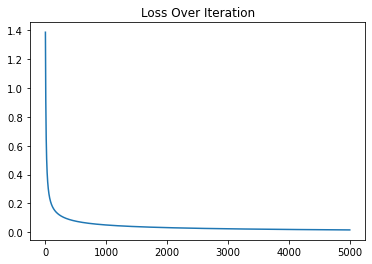

In [ ]:
#Encode y values
y_train = encode(y_new_train) 
#Initialize Parameters
alpha = 1e-3
epochs = 5000
loss_arr = []
numberSamples = len(y_new_train)
#weights are a vector of the size of the image with number of classes
w = np.zeros((64,4))
b = np.zeros(4)
weight_images_class1 = []
weight_images_class2 = []
weight_images_class3 = []
weight_images_class4 = []
for i in range(epochs):
    getupdate = update(w,b,x_new_train,y_train)
    #update w's and append loss
    w = w-alpha*getupdate[1]
    b = b-alpha*getupdate[2]
    loss_arr.append(getupdate[0])
    #Print w's as images 
    max_elem = np.amax(w)
    if max_elem==0:
        max_elem = 1
    w_intermediate = w / max_elem
    w_rescaled = w_intermediate * 255
    transposed = w_rescaled.T
    img = transposed.astype(np.uint8)
    for i in range(len(img)):
        reshaped_w = np.reshape(img[i],(8,8))
        reshape_3 = np.repeat(reshaped_w[:,:,np.newaxis],3,axis=2)
        if i ==0:
            weight_images_class1.append(reshape_3)
        if i ==1:
            weight_images_class2.append(reshape_3)
        if i ==2:
            weight_images_class3.append(reshape_3)
        if i ==3:
            weight_images_class4.append(reshape_3)
plt.title('Loss Over Iteration')
plt.plot(range(epochs),loss_arr)
plt.show()

Display Images of each class of weights over epochs. Videos cannot be displayed but are included in submission for user inputs 1,2,3,4. 

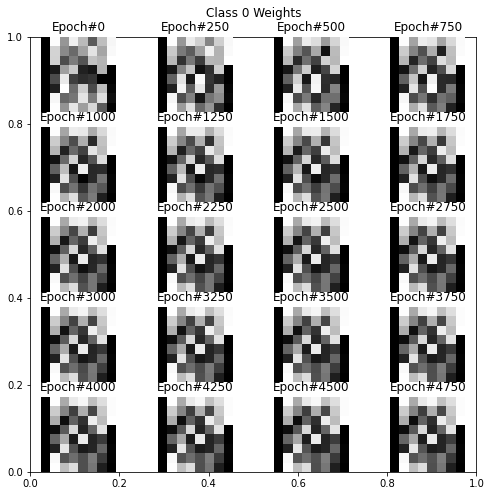

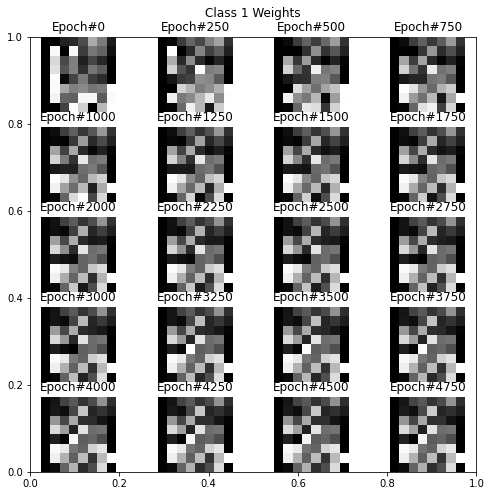

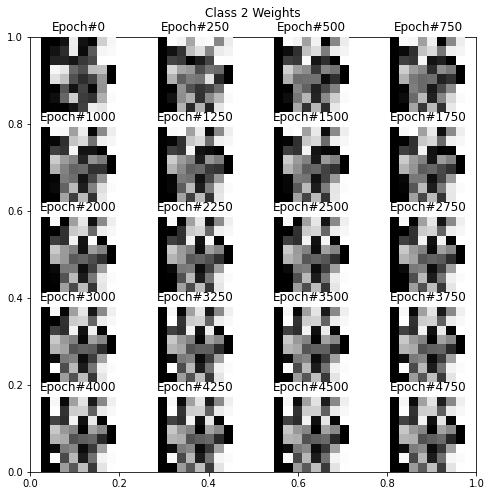

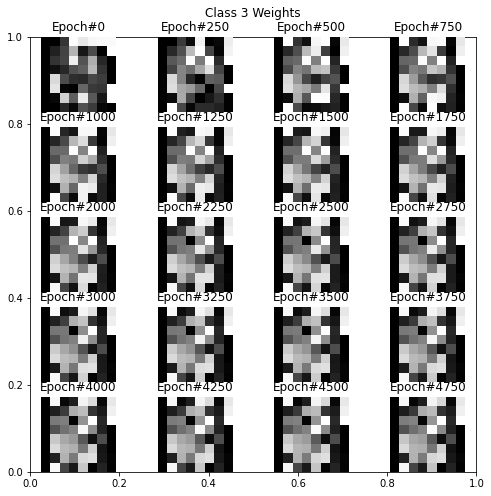

In [ ]:
#Display 20 images of weights for batch 0 over time
def showWeights(images,c):
    fig = plt.figure(figsize=(8, 8))
    fig.tight_layout()
    columns = 4
    rows = 5
    plt.title("Class "+ str(c) +" Weights",pad=20)
    for i in range(1, columns*rows +1):
        img = images[(i-1)*250]
        fig.add_subplot(rows, columns, i)
        plt.title('Epoch#' + str((i-1)*250))
        plt.axis('off')
        plt.imshow(img)
    plt.show()
showWeights(weight_images_class1,0)
showWeights(weight_images_class2,1)
showWeights(weight_images_class3,2)
showWeights(weight_images_class4,3)
#Video Generation. Will not display on jupyter notebook. Mock code just available. 
def createVideo(images,c):
    import cv2
    import numpy as np
    frameSize = (8, 8)
    out = cv2.VideoWriter('output_video_class '+str(c) +'.avi',cv2.VideoWriter_fourcc(*'DIVX'), 120, frameSize)
    for i in range(len(images)):
        img = images[i]
        out.write(img)
    out.release()
createVideo(weight_images_class1,0)
createVideo(weight_images_class2,1)
createVideo(weight_images_class3,2)
createVideo(weight_images_class4,3)


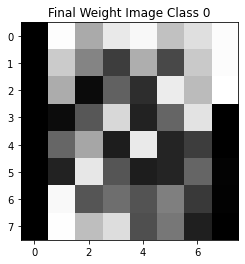

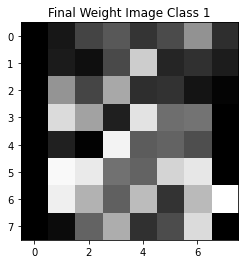

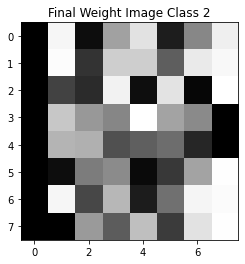

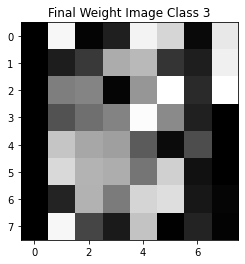

In [ ]:
#Show Final Weight Images
plt.figure()
plt.title('Final Weight Image Class 0')
plt.imshow(weight_images_class1[4999])
plt.figure()
plt.title('Final Weight Image Class 1')
plt.imshow(weight_images_class2[4999])
plt.figure()
plt.title('Final Weight Image Class 2')
plt.imshow(weight_images_class3[4999])
plt.figure()
plt.title('Final Weight Image Class 3')
plt.imshow(weight_images_class4[4999])

Make prediction and get accuracy

In [ ]:
def Prediction(x,w,b):
    z_pred = np.dot(x,w)+b
    out = softmax(z_pred)
    return np.argmax(out, axis=1)

pred_test = Prediction(x_new_test,w,b)
for i in range(len(pred_test)):
    if pred_test[i] == 3:
        pred_test[i] = number4[0]
    if pred_test[i] == 2:
        pred_test[i] = number3[0]
    if pred_test[i] == 1:
        pred_test[i] = number2[0]
    if pred_test[i] == 0:
        pred_test[i] = number1[0]

pred_train = Prediction(x_new_train,w,b)
for i in range(len(pred_train)):
    if pred_train[i] == 3:
        pred_train[i] = number4[0]
    if pred_train[i] == 2:
        pred_train[i] = number3[0]
    if pred_train[i] == 1:
        pred_train[i] = number2[0]
    if pred_train[i] == 0:
        pred_train[i] = number1[0]

accuracy_test = np.sum(y_new_test==pred_test)/len(y_new_test)
accuracy_train = np.sum(y_new_train==pred_train)/len(y_new_train)
print('Alpha = ', alpha)
print('Accuracy test = ', accuracy_test)
print('Accuracy train = ', accuracy_train)


Alpha =  0.001
Accuracy test =  0.9672131147540983
Accuracy train =  1.0


In [ ]:
#Report on model
def Report(final,y_new_test):
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import classification_report
  c = confusion_matrix(y_new_test,final)
  a = accuracy_score(y_new_test, final)
  r = recall_score(y_new_test, final, average=None)
  p = precision_score(y_new_test, final, average=None)
  f = f1_score(y_new_test, final, average=None)
  print("Confusion Matrix\n", c)
  print("\nReport\n",classification_report(y_new_test, final))
Report(pred_test,y_new_test)

Confusion Matrix
 [[14  0  0  0]
 [ 0 16  0  0]
 [ 0  0 15  0]
 [ 0  0  2 14]]

Report
               precision    recall  f1-score   support

           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        16
           8       0.88      1.00      0.94        15
           9       1.00      0.88      0.93        16

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

